In this notebook, we'll ask you to find numerical summaries for a certain set of data. You will use the values of what you find in this assignment to answer questions in the quiz that follows (we've noted where specific values will be requested in the quiz, so that you can record them.)

We'll also ask you to create some of the plots you have seen in previous lectures.   



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "nhanes_2015_2016.csv"

In [6]:
# First, you must import the data from the path given above
df = pd.read_csv(path) # using pandas, read in the csv data found at the url defined by 'path'
df.head(5)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


How many rows can you see when you don't put an argument into the previous method? 5 

How many rows can you see if you use an int as an argument? _int_ rows 

Can you use a float as an argument? No

In [7]:
# Lets only consider the feature (or variable) 'BPXSY2'
bp = df['BPXSY2']
bp.describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

## Numerical Summaries
### Find the mean (note this for the quiz that follows)

In [13]:
# What is the mean of 'BPXSY2'?
print(np.mean(bp))
print(bp.mean())

124.78301716350497
124.78301716350497


In [11]:
help(np.mean)

Help on function mean in module numpy.core.fromnumeric:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  Fo

#### .dropna()
To make sure we know that we aren't treating missing data in ways we don't want, lets go ahead and drop all the nans from our Series 'bp'

In [12]:
bp = bp.dropna()
print(np.mean(bp))

124.78301716350497


### Find the:
* Median
* Max
* Min
* Standard deviation
* Variance


You can implement any of these from base python (that is, without any of the imported packages), but there are simple and intuitively named functions in the numpy library for all of these. You could also use the fact that 'bp' is not just a list, but is a pandas.Series. You can find pandas.Series attributes and methods [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.html)

A large part of programming is being able to find the functions you need and to understand the documentation formatting so that you can implement the code yourself, so we highly encourage you to search the internet whenever you are unsure! 

In [18]:
print(bp.median())
print(bp.max())
print(bp.min())
print(bp.std())
print(bp.var())

122.0
238.0
84.0
18.527011720294997
343.2501632839482


In [21]:
print(stats.describe(bp))

DescribeResult(nobs=5535, minmax=(84.0, 238.0), mean=124.78301716350497, variance=343.2501632839482, skewness=1.0439848451761908, kurtosis=1.9438961756913917)


### Example: 
Find the difference of an element in 'bp' compared with the previous element in 'bp'.

In [24]:
# Using the fact that 'bp' is a pd.Series object, can use the pd.Series method diff()
# call this method by: pd.Series.diff()
diff_by_series_method = bp.diff() 
print(diff_by_series_method)
# note that this returns a pd.Series object, that is, it had an index associated with it
print(diff_by_series_method.values) # only want to see the values, not the index and values

0        NaN
1       16.0
2       -8.0
3        2.0
4      -20.0
5        8.0
6      -10.0
7        2.0
9       66.0
10     -30.0
11     -42.0
12      -4.0
13      12.0
14      20.0
15      10.0
16     -44.0
17       6.0
18      36.0
19     -18.0
20     -20.0
21      40.0
22     -14.0
23     -22.0
24      22.0
25     -22.0
26      14.0
27      12.0
28       4.0
29     -16.0
30      24.0
        ... 
5703    66.0
5704   -42.0
5705    32.0
5706   -36.0
5707     0.0
5708   -32.0
5709    26.0
5710     8.0
5711     6.0
5712   -34.0
5713     8.0
5714    52.0
5715   -40.0
5717   -14.0
5718     8.0
5720    -2.0
5721    -4.0
5722    -4.0
5723    26.0
5724   -14.0
5725   -10.0
5726    16.0
5727    38.0
5728   -48.0
5729    -6.0
5730     0.0
5731     4.0
5732    30.0
5733   -40.0
5734     8.0
Name: BPXSY2, Length: 5535, dtype: float64
[ nan  16.  -8. ...  30. -40.   8.]


In [25]:
# Now use the numpy library instead to find the same values
# np.diff(array)
diff_by_np_method = np.diff(bp)
diff_by_np_method
# note that this returns an 'numpy.ndarray', which has no index associated with it, and therefore ignores
# the nan we get by the Series method

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [26]:
# We could also implement this ourselves with some looping
diff_by_me = [] # create an empty list
for i in range(len(bp.values)-1): # iterate through the index values of bp
    diff = bp.values[i+1] - bp.values[i] # find the difference between an element and the previous element
    diff_by_me.append(diff) # append to out list
np.array(diff_by_me) # format as an np.array

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

### Your turn (note these values for the quiz that follows)

In [17]:
bp_median = np.nanmedian(bp)
print(bp_median)

122.0


In [23]:
bp_max = np.nanmax(bp)
print(bp_max)

238.0


In [22]:
bp_min = np.nanmin(bp)
print(bp_min)

84.0


In [24]:
bp_std = np.nanstd(bp)
print(bp_std)

18.525338021233786

In [25]:
bp_var = np.nanvar(bp)
print(bp_var)

343.1881488009701


### How to find the interquartile range (note this value for the quiz that follows)
This time we need to use the scipy.stats library that we imported above under the name 'stats'

In [34]:
Q1 = np.nanpercentile(bp, 25)
Q2 = np.nanpercentile(bp, 50)
Q3 = np.nanpercentile(bp, 75)
print(Q3-Q1)

22.0


## Visualizing the data
Next we'll use what you have learned from the *Tables, Histograms, Boxplots in Python* video

In [27]:
# use the Series.describe() method to see some descriptive statistics of our Series 'bp'
bp_descriptive_stats = bp.describe()
bp_descriptive_stats

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

[Text(0,0.5,'Proportion'),
 Text(0.5,0,'BPXSY2 Column Values'),
 Text(0.5,1,'Histogram of BPXSY2 Column')]

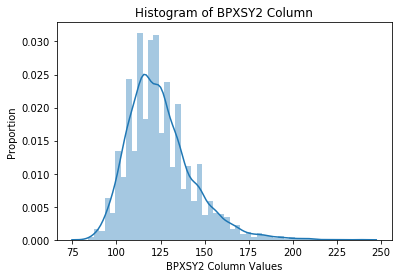

In [39]:
# Make a histogram of our 'bp' data using the seaborn library we imported as 'sns'
sns.distplot(bp, kde=True).set(title = "Histogram of BPXSY2 Column", xlabel = "BPXSY2 Column Values", ylabel = "Proportion")

Is your histogram labeled and does it have a title?
If not, try appending 
```
.set(title='your_title', xlabel='your_x_label', ylabel='your_y_label')
```
or just
```
.set(title='your_title')
```
to your graphing function

[Text(0.5,0,'BPXSY2 Column Values'), Text(0.5,1,'Boxplot of BPXSY2 Column')]

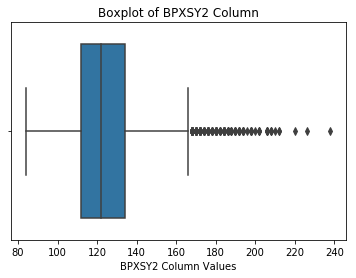

In [38]:
# Make a boxplot of our 'bp' data using the seaborn library. Make sure it has a title and labels!
sns.boxplot(bp).set(title = "Boxplot of BPXSY2 Column", xlabel = "BPXSY2 Column Values")